In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import pickle
from testsuite.utilities import Pareto_split
import numpy as np
from testsuite.analysis import load_all, plot_pareto_2d, plot_all_pareto_3d, PLOT_STYLE, plot_measure

In [2]:
dir_path = os.getcwd()
result_dirs = sorted(os.listdir("./log_data/"))
result_dirs

['test_function_Saf_Saf_init10_MultiSurrogate_ei',
 'test_function_Saf_Sms_init10_MultiSurrogate_mean',
 'test_function_Saf_init10_MultiSurrogate_GP_ei',
 'test_function_Saf_init10_MultiSurrogate_GP_mean',
 'test_function_SmsEgo_init10_MultiSurrogate_GP_ei',
 'test_function_SmsEgo_init10_MultiSurrogate_GP_mean',
 'test_function_Sms_Saf_init10_MultiSurrogate_mean']

In [3]:
safsaf_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[0]))
safsms_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[1]))
saf_ei_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[2]))
saf_mu_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[3]))
sms_ei_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[4]))
sms_mu_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[5]))
smssaf_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[6]))

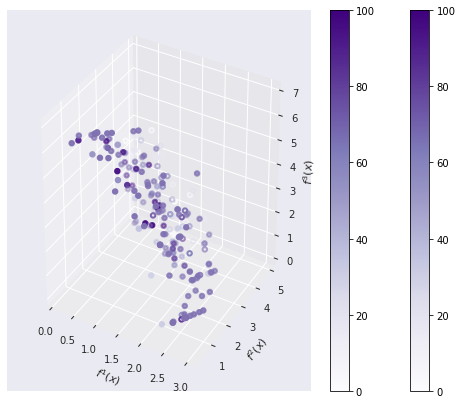

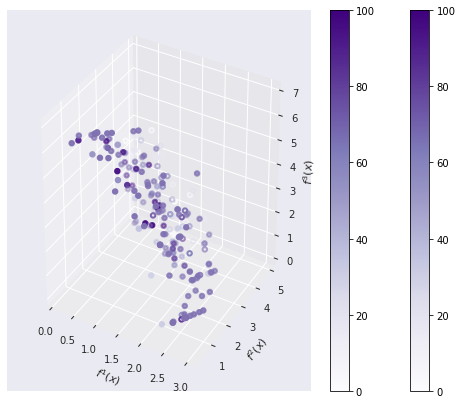

In [5]:
fig_safmu = plot_all_pareto_3d(saf_mu_results, plot_indices=[0])
plot_all_pareto_3d(saf_ei_results, axis=fig_safmu.gca(), plot_indices=[1], color="C3")
fig_safmu

In [3]:
fig_safei = plot_all_pareto_3d(saf_ei_results, axis=fig_safmu.gca(), plot_indices=[1])

NameError: name 'saf_ei_results' is not defined

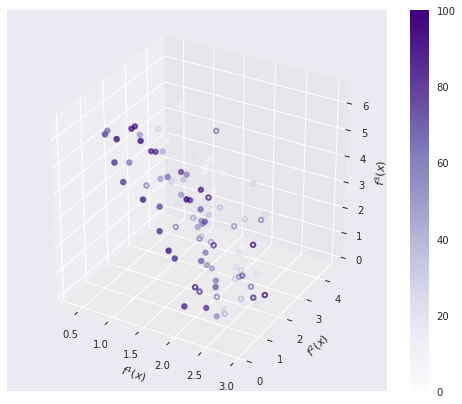

In [9]:
fig_smsmu = plot_all_pareto_3d(sms_mu_results, plot_indices=[0])


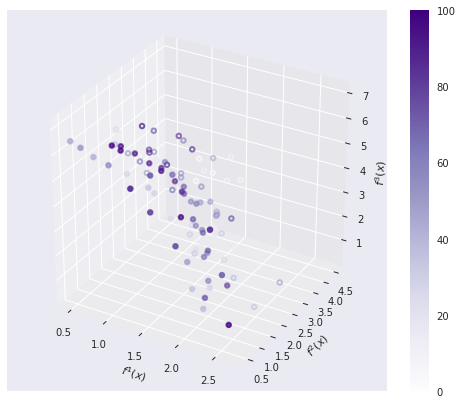

In [10]:
fig_smsmei= plot_all_pareto_3d(sms_ei_results, plot_indices=[0])

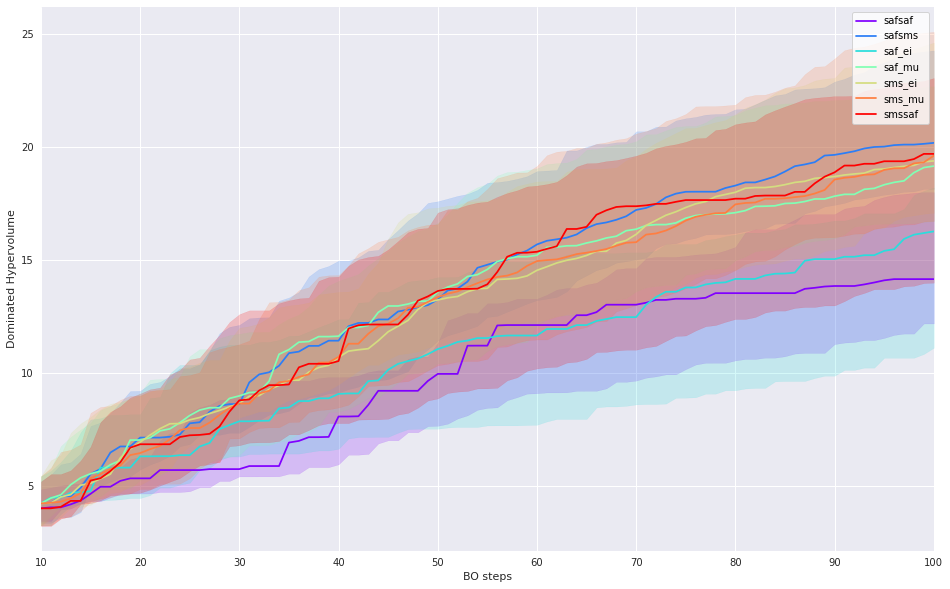

In [5]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(safsaf_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="safsaf", color=colors[0])
plot_measure(safsms_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="safsms", color=colors[1])
plot_measure(saf_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf_ei", color=colors[2])
plot_measure(saf_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf_mu", color=colors[3])
plot_measure(sms_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms_ei", color=colors[4])
plot_measure(sms_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms_mu", color=colors[5])
plot_measure(smssaf_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="smssaf", color=colors[6])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Dominated Hypervolume")
ax_hv.legend()

In [11]:
print(np.sum([len(errors) for errors in safsaf_results["errors"]]), "\t",*[errors for errors in safsaf_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in safsms_results["errors"]]), "\t",*[errors for errors in safsms_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_ei_results["errors"]]), "\t",*[errors for errors in saf_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_mu_results["errors"]]), "\t",*[errors for errors in saf_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_ei_results["errors"]]), "\t",*[errors for errors in sms_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_mu_results["errors"]]), "\t",*[errors for errors in sms_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in smssaf_results["errors"]]), "\t",*[errors for errors in smssaf_results["errors"] if len(errors)>0])

0 	
0 	
0 	
0 	
0 	
0 	
0 	


In [13]:
print(np.mean([times for times in safsaf_results["train_time"]]))
print(np.mean([times for times in safsms_results["train_time"]]))
print(np.mean([times for times in saf_ei_results["train_time"]]))
print(np.mean([times for times in saf_mu_results["train_time"]]))
print(np.mean([times for times in sms_ei_results["train_time"]]))
print(np.mean([times for times in sms_mu_results["train_time"]]))
print(np.mean([times for times in smssaf_results["train_time"]]))

23325.43152127947
4741.497325181961
0.0
0.0
0.0
0.0
14078.953549124977


In [4]:
from pymoo.factory import get_performance_indicator
import wfg

In [5]:
N= 500
## establish objective function
kfactor = 1
lfactor = 2 
M = 5 # number of "underlying positional parameters" +1 
k = kfactor*(M-1) # position related parameers (must be devisible by M-1)
l = lfactor*2 # distance-related parameters, muist be even for WFG2 & WFG3
l = 3

n_obj = 3 # must be from 1:M 
n_dim = l+k

x_limits = np.zeros((2, n_dim))
x_limits[1] = np.array(range(1,n_dim+1))*2

# fun = BM.wfg
fun =wfg.WFG6
args = [k, n_obj] # number of objectives as argument


y = np.zeros((N, n_obj))
for n in range(N):
    z = wfg.random_soln(k, l, fun.__name__)
    y[n,:] = fun(z, k, n_obj)

In [6]:
igdp = get_performance_indicator("igd+", y)

def extract_performance(z, indicator):
    ANS  = []
    for i in range(9, len(z)):
        ans = indicator.calc(z[:i])
        ANS.append(ans)

    return ANS

In [7]:
safsaf_results['igd'] = [extract_performance(safsaf_results["y"][i], igdp) for i in range(len(safsaf_results["y"]))]
safsms_results['igd'] = [extract_performance(safsms_results["y"][i], igdp) for i in range(len(safsms_results["y"]))]
saf_ei_results['igd'] = [extract_performance(saf_ei_results["y"][i], igdp) for i in range(len(saf_ei_results["y"]))]
saf_mu_results['igd'] = [extract_performance(saf_mu_results["y"][i], igdp) for i in range(len(saf_mu_results["y"]))]
sms_ei_results['igd'] = [extract_performance(sms_ei_results["y"][i], igdp) for i in range(len(sms_ei_results["y"]))]
sms_mu_results['igd'] = [extract_performance(sms_mu_results["y"][i], igdp) for i in range(len(sms_mu_results["y"]))]
smssaf_results['igd'] = [extract_performance(smssaf_results["y"][i], igdp) for i in range(len(smssaf_results["y"]))]
lhs_results['igd'] = [[extract_performance(lhs_results["y"][i], igdp) for i in range(len(lhs_results["y"]))]]

NameError: name 'lhs_results' is not defined

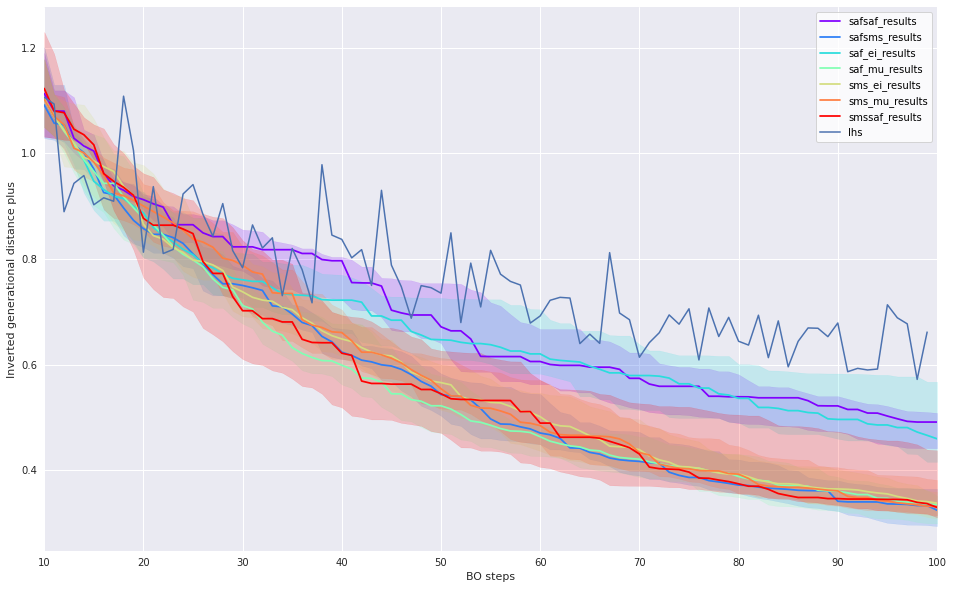

In [49]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(safsaf_results, measure="igd", axis=ax_hv, plot_individuals=False, label="safsaf_results", color=colors[0])
plot_measure(safsms_results, measure="igd", axis=ax_hv, plot_individuals=False, label="safsms_results", color=colors[1])
plot_measure(saf_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf_ei_results", color=colors[2])
plot_measure(saf_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf_mu_results", color=colors[3])
plot_measure(sms_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms_ei_results", color=colors[4])
plot_measure(sms_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms_mu_results", color=colors[5])
plot_measure(smssaf_results, measure="igd", axis=ax_hv, plot_individuals=False, label="smssaf_results", color=colors[6])
ax_hv.plot(range(10,100), lhs_results["igd"][10:], label="lhs")
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Inverted generational distance plus")
ax_hv.legend()

In [22]:
print(len(safsaf_results["y"]))
print(len(safsms_results["y"]))
print(len(saf_ei_results["y"]))
print(len(saf_mu_results["y"]))
print(len(sms_ei_results["y"]))
print(len(sms_mu_results["y"]))
print(len(smssaf_results["y"]))

7
14
20
20
20
20
11


In [9]:
limits = safsaf_results["limits"][0]
x_sample = safsaf_results["x"][0]

In [11]:
import lhsmdu

In [60]:
lhsx = np.array([[np.array(lhsmdu.sample(numSamples = i, numDimensions=np.shape(limits)[1])).T*limits[1] for i in range(1,101)] for i in range(4)])

In [62]:
np.save("./lhsx.npy", lhsx)

In [63]:
a = np.load("./lhsx.npy")

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [51]:
lhsy = [[np.array([fun(xi, k, n_obj) for xi in x]) for x in lhsxi] for lhsxi in lhsx]

In [54]:
lhs_igd = np.array([[igdp.calc(y) for y in lhsyi] for lhsyi in lhsy])

In [46]:
lhs_results = {"x": lhsx,
              "y": lhsy,
              "igd": lhs_igd} 

In [ ]:
lhs_results["y"]

In [55]:
lhs_igd.shape

(2, 100)

In [56]:
np.shape(lhsy)

(2, 100)

In [57]:
safsaf_results["y"][0]

array([[1.2089431 , 2.05504466, 6.28160574],
       [0.96848685, 1.14343169, 6.64323467],
       [1.87800565, 1.70204502, 5.15810664],
       [1.68958928, 3.71603232, 1.97101212],
       [2.06898406, 1.16292076, 3.32217961],
       [1.95772032, 2.45878854, 3.08634306],
       [2.15619747, 3.20208169, 2.50993807],
       [1.02567021, 2.25899631, 6.00504035],
       [1.39510695, 1.72957775, 4.97491097],
       [1.67770701, 3.84484864, 1.93790528],
       [0.9119233 , 1.10963029, 6.60467793],
       [0.84463389, 0.85607886, 6.84221345],
       [0.8634683 , 0.76368605, 6.7094196 ],
       [2.02894253, 0.60186971, 3.79032799],
       [2.38591377, 0.83294757, 0.74421885],
       [0.90644708, 0.90646608, 6.90629954],
       [0.55773127, 0.53254461, 6.52507812],
       [0.53345213, 0.54230097, 6.52891046],
       [1.51267137, 3.60275446, 4.14808047],
       [1.31432692, 4.52157169, 0.7156652 ],
       [0.77801054, 4.41221299, 2.14370121],
       [2.67161623, 0.75614184, 0.67569863],
       [2.